<a href="https://colab.research.google.com/github/kjghfnxggdgbvg/kjghfnxggdgbvg/blob/main/random_forest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/content/Fraud_check (1).csv")

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.shape

(600, 6)

In [6]:
df = pd.get_dummies(df,drop_first=True)

In [7]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [8]:
df['tax'] = pd.cut(df['Taxable.Income'], bins=[10002,30000,99620],labels = ['Risky','good'])

In [9]:
print(df)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES   tax  
0                         0                      1          1  go

In [10]:
df = pd.get_dummies(df,columns = ['tax'],drop_first=True)

In [11]:
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,tax_good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1


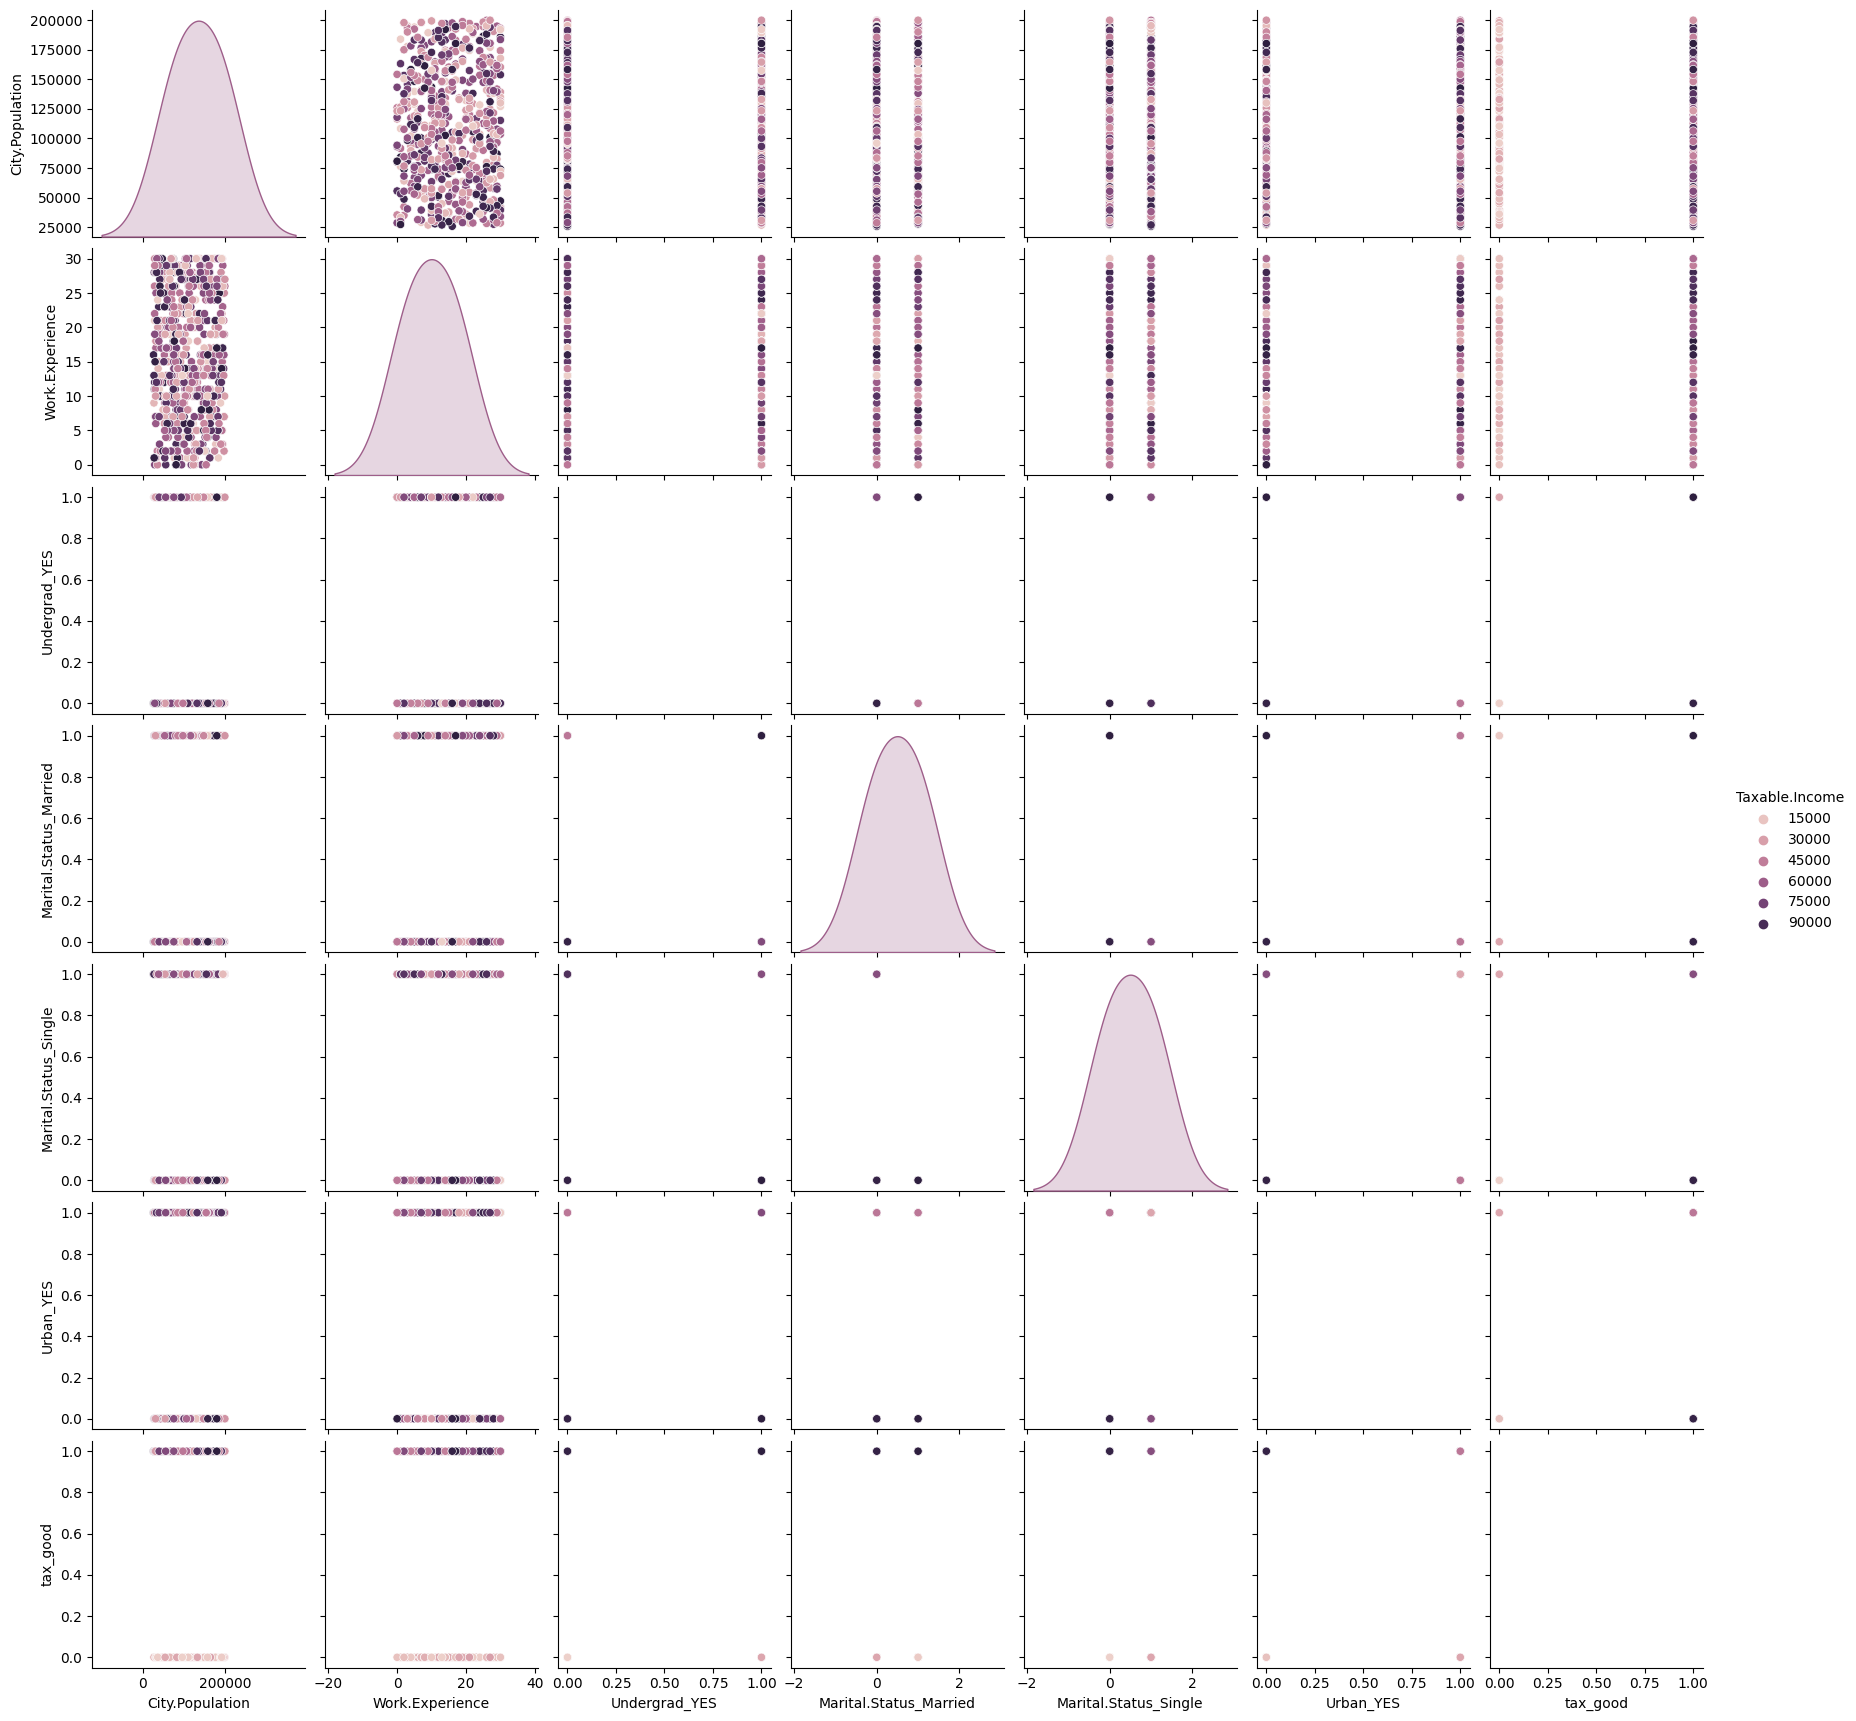

In [12]:
import seaborn as sns
sns.pairplot(data=df , hue='Taxable.Income')

In [13]:
def norm_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return(x)

In [14]:
scale_df = norm_func(df.iloc[:,1:])
scale_df

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,tax_good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0


In [15]:
X = scale_df.drop(['tax_good'],axis=1)
y = scale_df['tax_good']

In [16]:
# SPLITTING THE DATA

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 ,random_state=42)

In [19]:
scale_df['income']='<=30000'
scale_df.loc[df['Taxable.Income']>=30000,'income']='good'
scale_df.loc[df['Taxable.Income']<=30000,'income']='risky'


In [20]:
df.drop(['Taxable.Income'],axis=1,inplace=True)

In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in df.columns:
  if df[column_name].dtype == object:
    df[column_name] = le.fit_transform(df[column_name])
  else:
    pass

In [22]:
scale_df

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,tax_good,income
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0,good
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0,good
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0,good
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0,good
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0,good
...,...,...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0,good
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0,good
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0,good
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0,good


In [23]:
import seaborn as sns

<ipython-input-24-25d6520fc3b3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(scale_df.corr(),annot=True,cmap='terrain')


<Axes: >

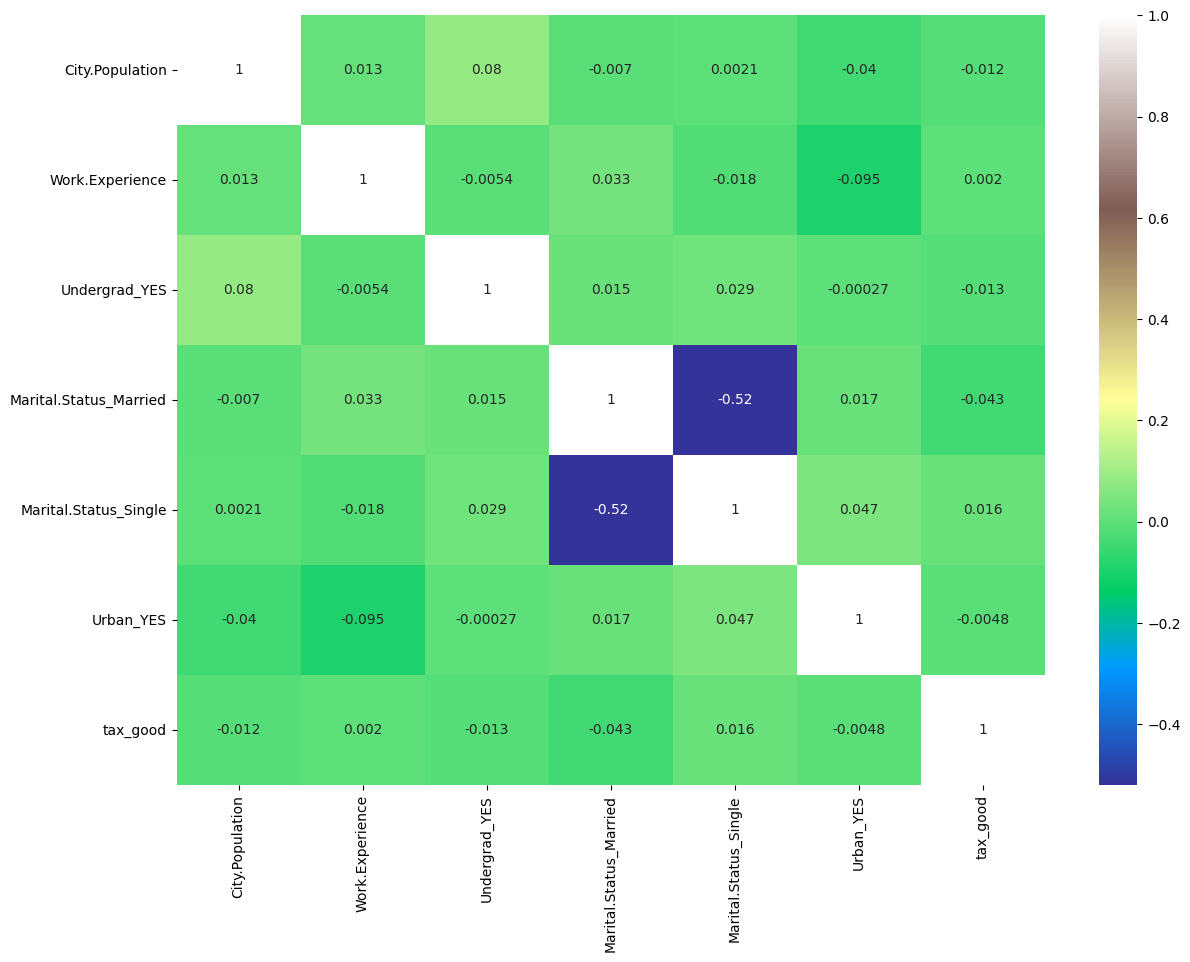

In [24]:
plt.figure(figsize=(14,10))
sns.heatmap(scale_df.corr(),annot=True,cmap='terrain')

In [25]:
# BUILD ensemble models

In [26]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

## **bagging model - bagging classifier**

In [27]:
base_model = LogisticRegression()

In [28]:
bagging_clf = BaggingClassifier(base_estimator=base_model,n_estimators=30)

In [29]:
bagging_clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=30)

In [30]:
bagg_pred = bagging_clf.predict(X_test)

In [31]:
confusion_matrix(y_test,bagg_pred)

array([[ 0, 26],
       [ 0, 94]])

In [32]:
print(classification_report(y_test,bagg_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        26
         1.0       0.78      1.00      0.88        94

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.metrics import roc_curve

##**auc-roc curve**

In [34]:
fpr, tpr ,thresh = roc_curve(y_test,bagg_pred)


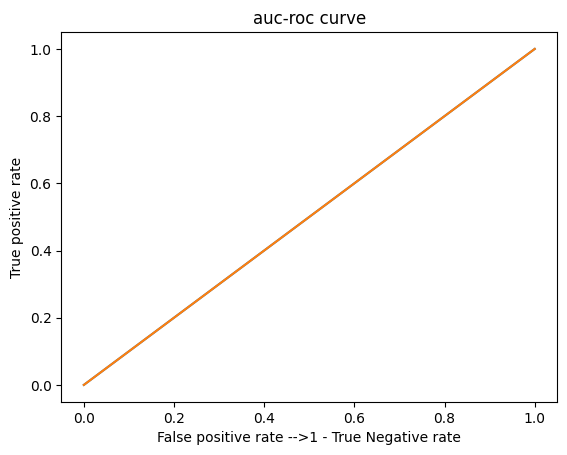

In [35]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel("False positive rate -->1 - True Negative rate")
plt.ylabel("True positive rate")
plt.title("auc-roc curve")
plt.show()

#**Random forest**

In [36]:
rf_model = RandomForestClassifier(n_estimators=50,max_depth=12,max_features=3)

In [37]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, max_features=3, n_estimators=50)

In [38]:
train_predicted = rf_model.predict(X_train)

In [39]:
confusion_matrix(y_train , train_predicted)

array([[ 94,   4],
       [  0, 382]])

In [40]:
print(classification_report(y_train , train_predicted))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        98
         1.0       0.99      1.00      0.99       382

    accuracy                           0.99       480
   macro avg       0.99      0.98      0.99       480
weighted avg       0.99      0.99      0.99       480



In [80]:
test_predicted = rf_model.predict(X_test)


In [42]:
confusion_matrix(y_test,test_predicted)

array([[ 0, 26],
       [ 5, 89]])

In [43]:
print(classification_report(y_test , test_predicted))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        26
         1.0       0.77      0.95      0.85        94

    accuracy                           0.74       120
   macro avg       0.39      0.47      0.43       120
weighted avg       0.61      0.74      0.67       120



In [81]:
fpr, tpr ,thresh = roc_curve(y_test,test_predicted)

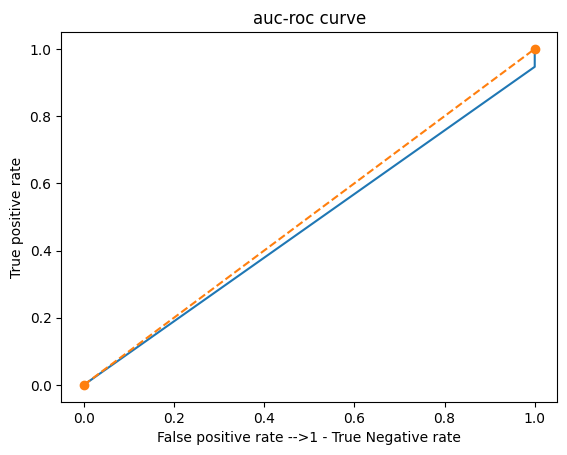

In [82]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'o--')
plt.xlabel("False positive rate -->1 - True Negative rate")
plt.ylabel("True positive rate")
plt.title("auc-roc curve")
plt.show()

#**ADBOOST CLASSIFIER**

In [45]:
adb_clf = AdaBoostClassifier(n_estimators=50)

In [46]:
adb_clf.fit(X_train,y_train)

AdaBoostClassifier()

In [47]:
adb_pred = adb_clf.predict(X_test)

In [48]:
confusion_matrix(y_test,adb_pred)

array([[ 0, 26],
       [ 1, 93]])

In [49]:
print(classification_report(y_test,adb_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        26
         1.0       0.78      0.99      0.87        94

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.61      0.78      0.68       120



#**STACKING**

In [50]:
estimators = []

## build the base model

In [51]:
model_1 = LogisticRegression()
estimators.append(('logreg', model_1))


In [52]:
model_2 = SVC()
estimators.append(('svm', model_2))

In [53]:
model_3 = DecisionTreeClassifier(max_depth=3)
estimators.append(('decision tree',model_3))

In [54]:
len(estimators)

3

**build the ensemble**

In [55]:
model = VotingClassifier(estimators)

In [56]:
model.fit(X_train,y_train)

VotingClassifier(estimators=[('logreg', LogisticRegression()), ('svm', SVC()),
                             ('decision tree',
                              DecisionTreeClassifier(max_depth=3))])

In [57]:
st_pred = model.predict(X_test)

In [58]:
confusion_matrix(y_test,st_pred)

array([[ 0, 26],
       [ 0, 94]])

In [59]:
print(classification_report(y_test,st_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        26
         1.0       0.78      1.00      0.88        94

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**auc-roc curve**

In [60]:
fpr , tpr , thresh = roc_curve(y_test,st_pred)

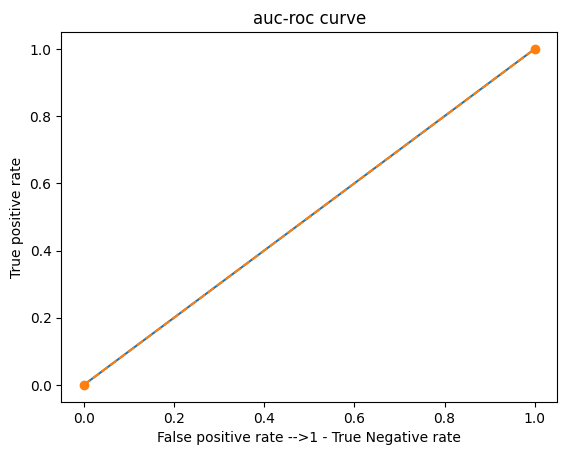

In [61]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], 'o--')
plt.xlabel("False positive rate -->1 - True Negative rate")
plt.ylabel("True positive rate")
plt.title("auc-roc curve")
plt.show()

In [62]:
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,StackingRegressor

In [63]:
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
scale_df

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,tax_good,income
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0,good
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0,good
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0,good
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0,good
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0,good
...,...,...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0,good
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0,good
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0,good
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0,good


bagging model-bagging regressor

In [68]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()

In [69]:
bagging_reg = BaggingRegressor(base_estimator=base_model,n_estimators=50)

In [70]:
bagging_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=LinearRegression(), n_estimators=50)

In [71]:
begg_pred = bagging_reg.predict(X_test)

get the metrics

In [72]:
mean_squared_error(y_test,begg_pred)

0.17918993249526596

In [73]:
r2_score(y_test,begg_pred)

-0.05578356298356413

random forest regressor

In [74]:
rfr_model = RandomForestRegressor(n_estimators=50,max_depth=12,max_features=3)

In [75]:
rfr_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=12, max_features=3, n_estimators=50)

In [76]:
rfr_pred = rfr_model.predict(X_test)

In [77]:
mean_squared_error(y_test,rfr_pred)

0.20173136684326928

In [78]:
r2_score(y_test,rfr_pred)

-0.18859725144970496